## Linear Regression for Predicting Nitrogen (N) Requirement


**Predicting the amount of Nitrogen needed to be applied by farmers provided Potassius, Phosphorus, Temperature, pH, rainfall, and the crop they want to grow.**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from scipy import stats



In [4]:

# Load the dataset
data= pd.read_csv("Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Encode 'label' column (crop type)
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])

data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,21
1,85,58,41,21.770462,80.319644,7.038096,226.655537,21
2,60,55,44,23.004459,82.320763,7.840207,263.964248,21
3,74,35,40,26.491096,80.158363,6.980401,242.864034,21
4,78,42,42,20.130175,81.604873,7.628473,262.717340,21
5,69,37,42,23.058049,83.370118,7.073454,251.055000,21
6,69,55,38,22.708838,82.639414,5.700806,271.324860,21
7,94,53,40,20.277744,82.894086,5.718627,241.974195,21
8,89,54,38,24.515881,83.535216,6.685346,230.446236,21
9,68,58,38,23.223974,83.033227,6.336254,221.209196,21


In [6]:
X = data.drop('N', axis=1)  # Features: P, K, temperature, humidity, ph, rainfall, Label
y = data['N']  # Target: Nitrogen (N)

In [7]:
print(y.describe())

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64


In [8]:
# Split Data into Training and Testing Sets(80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#  Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# Predict Nitrogen (N) content on the test set
y_pred = lr_model.predict(X_test_scaled)

In [12]:
#  Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [13]:
print("Linear Regression Results:")
print(f"- RMSE: {rmse:.2f} (Lower is better)")
print(f"- R² Score: {r2:.2f} (1.0 is perfect)")


Linear Regression Results:
- RMSE: 33.82 (Lower is better)
- R² Score: 0.08 (1.0 is perfect)


In [14]:
# Step 9: Check Coefficients (Feature Importance)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', ascending=False)

print("\nFeature Impact on Nitrogen (N):")
print(coefficients)


Feature Impact on Nitrogen (N):
       Feature  Coefficient
3     humidity     7.668632
4           ph     1.753045
5     rainfall     1.635870
2  temperature    -0.748666
1            K    -1.273463
6        label    -9.218497
0            P   -11.455920


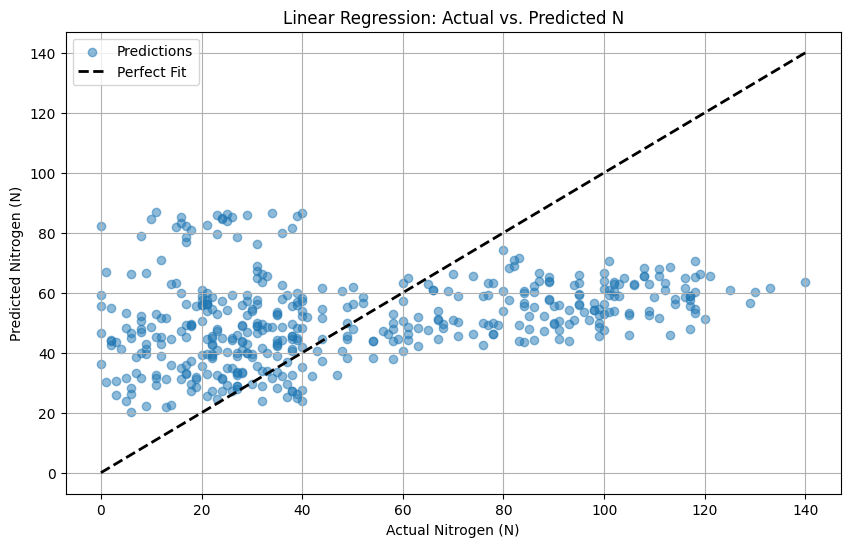

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Nitrogen (N)')
plt.ylabel('Predicted Nitrogen (N)')
plt.title('Linear Regression: Actual vs. Predicted N')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Model 2

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Initialize and train
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=42    # For reproducibility
)

In [18]:
# Model training
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

In [20]:
# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

In [21]:
print("Random Forest Results:")
print(f"- RMSE: {rmse_rf:.2f} (Lower is better)")
print(f"- R² Score: {r2_rf:.2f} (Higher is better)")

Random Forest Results:
- RMSE: 12.75 (Lower is better)
- R² Score: 0.87 (Higher is better)


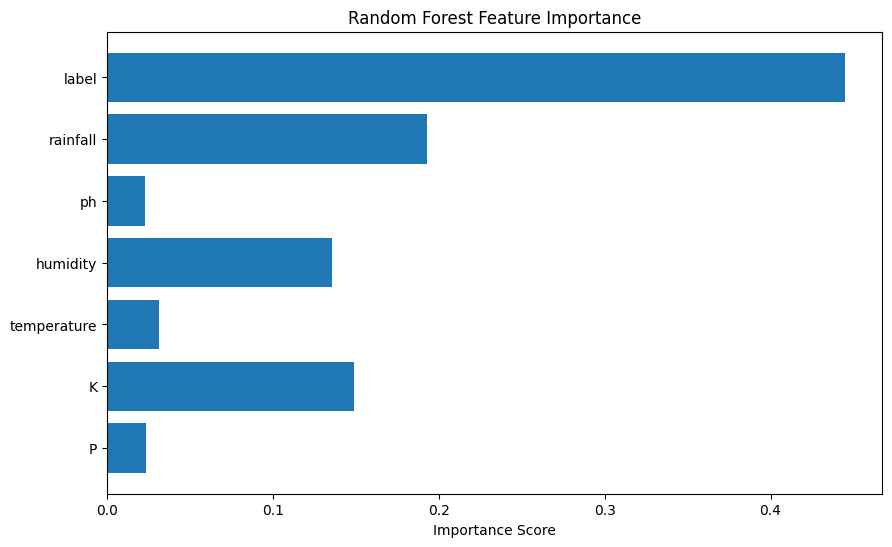

In [22]:
# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.show()

## Decision Tree Model 3


In [23]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid,
#     cv=5,
#     scoring='r2'
# )
# grid_search.fit(X_train_scaled, y_train)

# print("Best Parameters:", grid_search.best_params_)
# best_rf = grid_search.best_estimator_

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
# Initialize and train
dt_model = DecisionTreeRegressor(
    random_state=42,  # For reproducibility
    max_depth=5       # Prevents overfitting (adjust as needed)
)
# Model training
dt_model.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [30]:
# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)


In [31]:
# Evaluate
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"- RMSE: {rmse_dt:.2f} (Lower is better)")
print(f"- R² Score: {r2_dt:.2f} (Higher is better)")


Decision Tree Results:
- RMSE: 16.92 (Lower is better)
- R² Score: 0.77 (Higher is better)


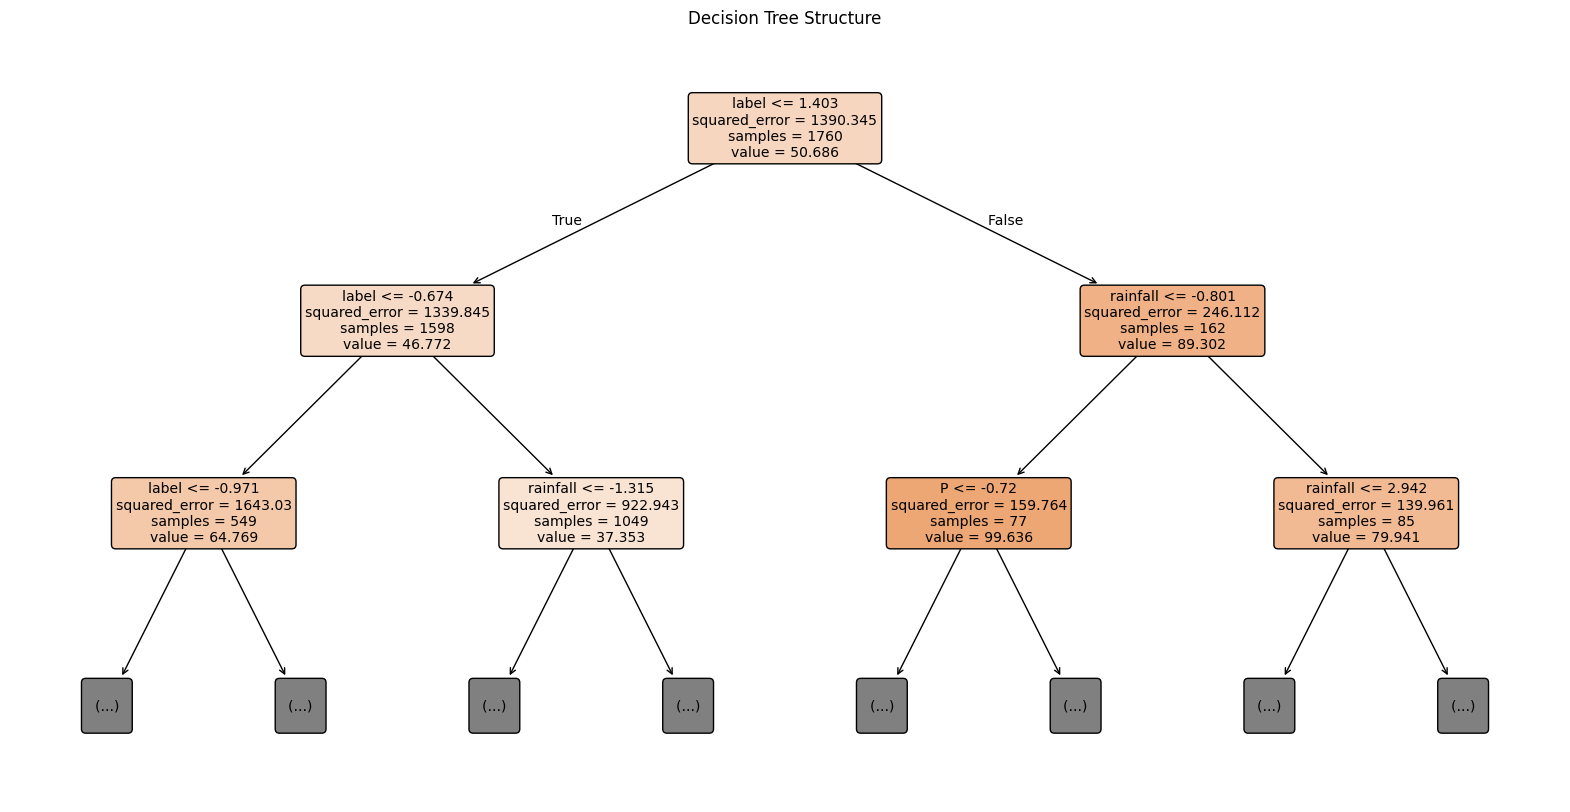

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=2 # Show only first 2 levels for readability
)
plt.title("Decision Tree Structure")
plt.show()

In [33]:
# Compare models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
    'RMSE': [rmse, rmse_rf, rmse_dt],
    'R² Score': [r2, r2_rf, r2_dt]
}).sort_values('R² Score', ascending=False)

print(results)

               Model       RMSE  R² Score
1      Random Forest  12.747614  0.869958
2      Decision Tree  16.922399  0.770834
0  Linear Regression  33.815303  0.084934


In [35]:
print("Label encoder classes:", le.classes_)
print("Type:", type(le.classes_[0]))

Label encoder classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'lentilF' 'maize' 'mango'
 'mothbeans' 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas'
 'pomegranate' 'rice' 'watermelon']
Type: <class 'str'>


In [37]:
# In your Jupyter notebook's last cell
import joblib

# Save the model and scaler
joblib.dump(dt_model, 'nitrogen_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Also save the label encoder mapping if you used one
label_mapping = {label: i for i, label in enumerate(le.classes_)}
joblib.dump(label_mapping, 'label_mapping.pkl')

print("Label encoder classes:", le.classes_)
print("Type:", type(le.classes_[0]))

Label encoder classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'lentilF' 'maize' 'mango'
 'mothbeans' 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas'
 'pomegranate' 'rice' 'watermelon']
Type: <class 'str'>
